Wine review
===========

This notebook contains all the code for the wine review problem.
As the dataset have a "points" field that gives notation of the wine, we will try to perform a regression task to predict the score of a wine.

In [7]:
# data managment
import pandas as pd
import numpy as np
from lib.RegressorManager import *
# preprocessing 
from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# plotting
from lib.PlotLearningCurve import plot_learning_curve
from matplotlib import pyplot as plt
import seaborn as sns
# learning
from sklearn.decomposition import SparsePCA

sns.set(color_codes=True)

In [2]:
# load our train and test datasets
winemag_df = pd.read_csv("datasets/wine_reviews/winemag-data-130k-v2.csv")

In [3]:
fashion_df = pd.read_csv("datasets/fashion_mnist/fashion-mnist_train.csv")

data preparation
----------------

first we need to clean the dataset, for this we will
 - select relevant columns
 - drop row containing na value (we can afford this because the ratio *number of row / input space dimension* is still good )
 - remove duplicate rows

In [4]:
X_winemag = winemag_df['description']
y_winemag = winemag_df['points']
(n_row, n_col) = fashion_df.values.shape
X_fashion = fashion_df.values[:, 1:n_col]
y_fashion = fashion_df.values[:, 0]

In [5]:
pipeline_wine = Pipeline(
    [
        ('vectorizer', CountVectorizer()),
        ('tfidf', TfidfTransformer(use_idf=True))
    ]
)

In [6]:
pipeline_wine.fit(X_winemag, y_winemag)
X_winemag_trans = pipeline_wine.transform(X_winemag)

In [19]:
pca = SparsePCA(n_components=3, svd_solver='full')
pca.fit(X_fashion)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)

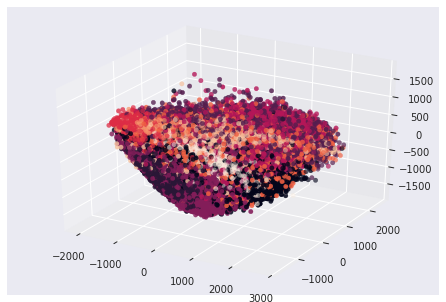

In [22]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
low_dim = pca.transform(X_fashion)
ax.scatter(low_dim[:, 0], low_dim[:, 1], low_dim[:, 2], c=y_fashion, s=0.01)
plt.show()